In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv(r"C:\Users\sandr\Desktop\churn-bigml-80.csv")
test_df = pd.read_csv(r"C:\Users\sandr\Desktop\churn-bigml-20.csv")
(train_df.head())

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### combining training and testing datasets into a single DataFrame

In [3]:
train_df['Data Set'] = 'train'
test_df['Data Set'] = 'test'

combined_df = pd.concat([train_df, test_df], ignore_index=True)


In [4]:
(combined_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

## Check for missing values

In [5]:
missing_values = combined_df.isnull().sum()
print(missing_values)

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
Data Set                  0
dtype: int64


### Check for duplicates

In [6]:
duplicates = combined_df.duplicated()
num_duplicates = duplicates.sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


## Convert column 'Churn' from bool to int

In [7]:
combined_df['Churn'] = combined_df['Churn'].astype(int)

## Display a random sample of rows from the 'Churn'

In [8]:
print(combined_df['Churn'].sample(15))

540     0
2537    0
2514    0
1062    1
871     1
1897    0
609     1
2830    0
1219    1
190     0
2427    0
1723    0
2546    0
2674    0
2498    0
Name: Churn, dtype: int32


## Replace spaces with underscores in column names

In [9]:
combined_df.columns = combined_df.columns.str.replace(' ', '_')

In [10]:
print(combined_df.columns)

Index(['State', 'Account_length', 'Area_code', 'International_plan',
       'Voice_mail_plan', 'Number_vmail_messages', 'Total_day_minutes',
       'Total_day_calls', 'Total_day_charge', 'Total_eve_minutes',
       'Total_eve_calls', 'Total_eve_charge', 'Total_night_minutes',
       'Total_night_calls', 'Total_night_charge', 'Total_intl_minutes',
       'Total_intl_calls', 'Total_intl_charge', 'Customer_service_calls',
       'Churn', 'Data_Set'],
      dtype='object')


## Compute descriptive statistics for numerical variables

In [11]:
combined_df.describe()

,Account_length,Area_code,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [12]:
combined_df.head()

,State,Account_length,Area_code,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,...,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn,Data_Set
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,train
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,train
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,train
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,train
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,train


## some Plot histograms for numerical variables

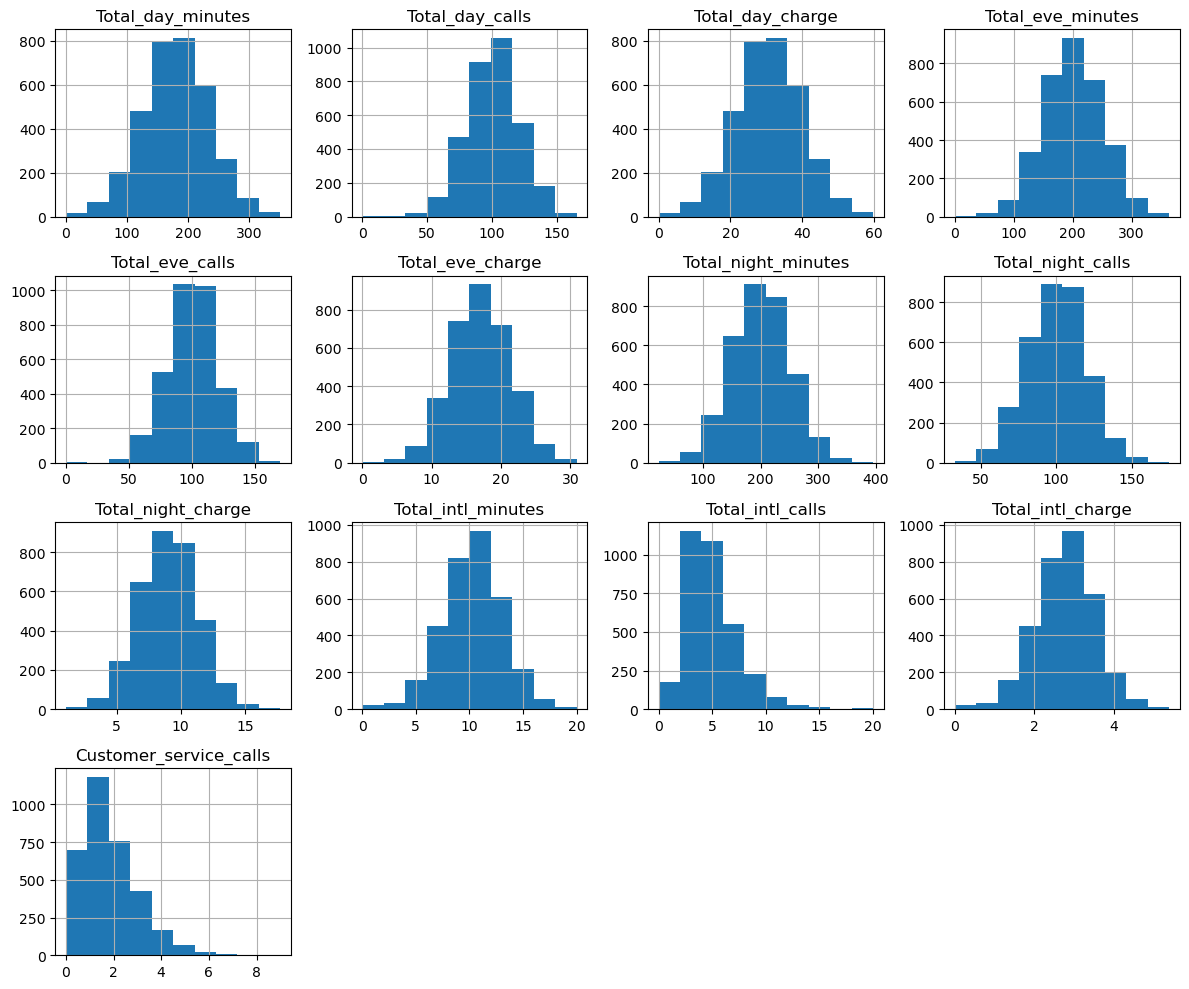

In [13]:
numerical_variables = ['Total_day_minutes', 'Total_day_calls', 'Total_day_charge', 'Total_eve_minutes', 'Total_eve_calls', 'Total_eve_charge', 'Total_night_minutes', 'Total_night_calls', 'Total_night_charge', 'Total_intl_minutes', 'Total_intl_calls', 'Total_intl_charge', 'Customer_service_calls']
combined_df[numerical_variables].hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

## bar charts for categorical variables

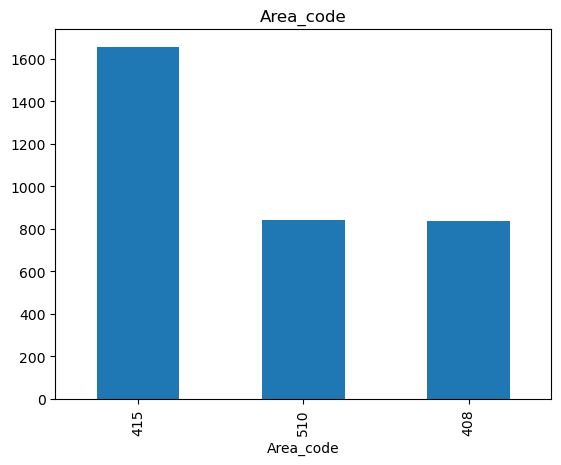

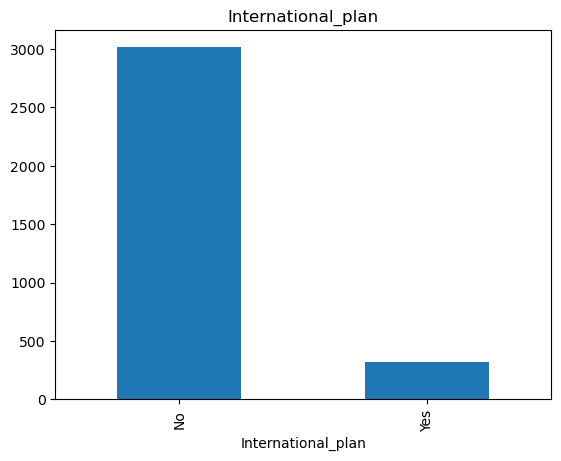

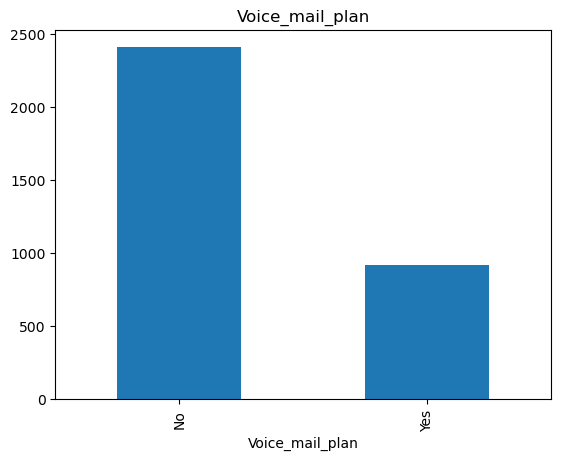

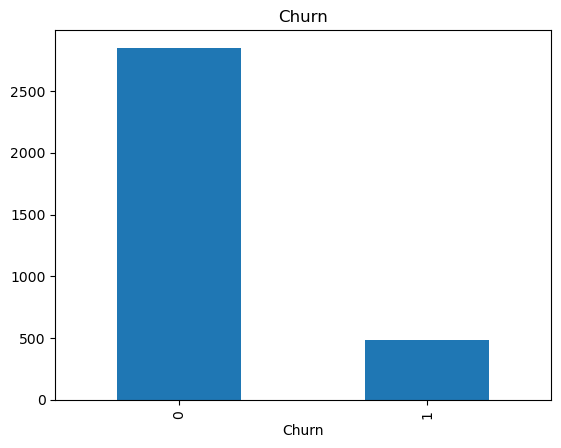

In [14]:
categorical_variables = ['Area_code', 'International_plan', 'Voice_mail_plan', 'Churn']
for var in categorical_variables:
    combined_df[var].value_counts().plot(kind='bar')
    plt.title(var)
    plt.show()

### Compute correlation matrix for numerical variables in a heatmap

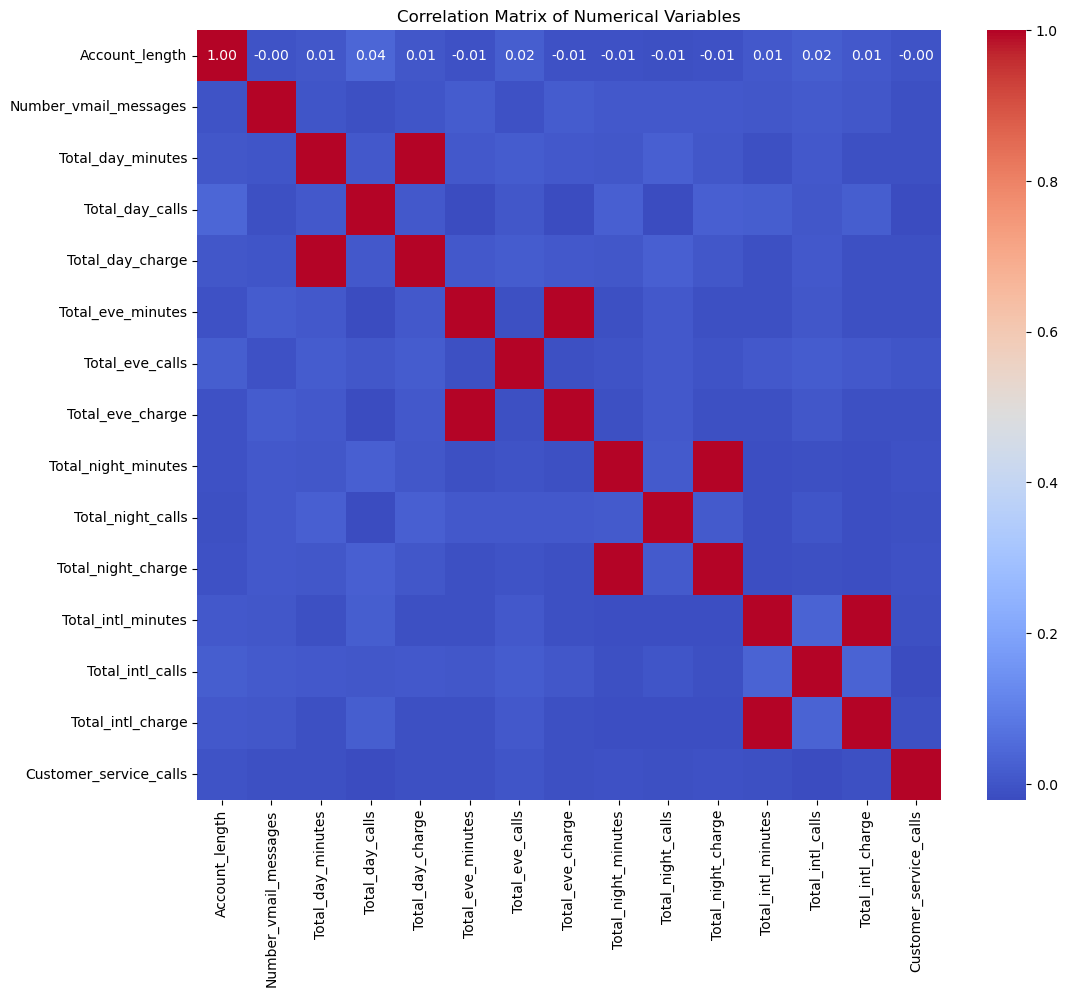

In [15]:

numerical_columns = ['Account_length', 'Number_vmail_messages', 'Total_day_minutes', 'Total_day_calls', 'Total_day_charge', 'Total_eve_minutes', 'Total_eve_calls', 'Total_eve_charge', 'Total_night_minutes', 'Total_night_calls', 'Total_night_charge', 'Total_intl_minutes', 'Total_intl_calls', 'Total_intl_charge', 'Customer_service_calls']
correlation_matrix = combined_df[numerical_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


### Drop variables that have multicollinearity

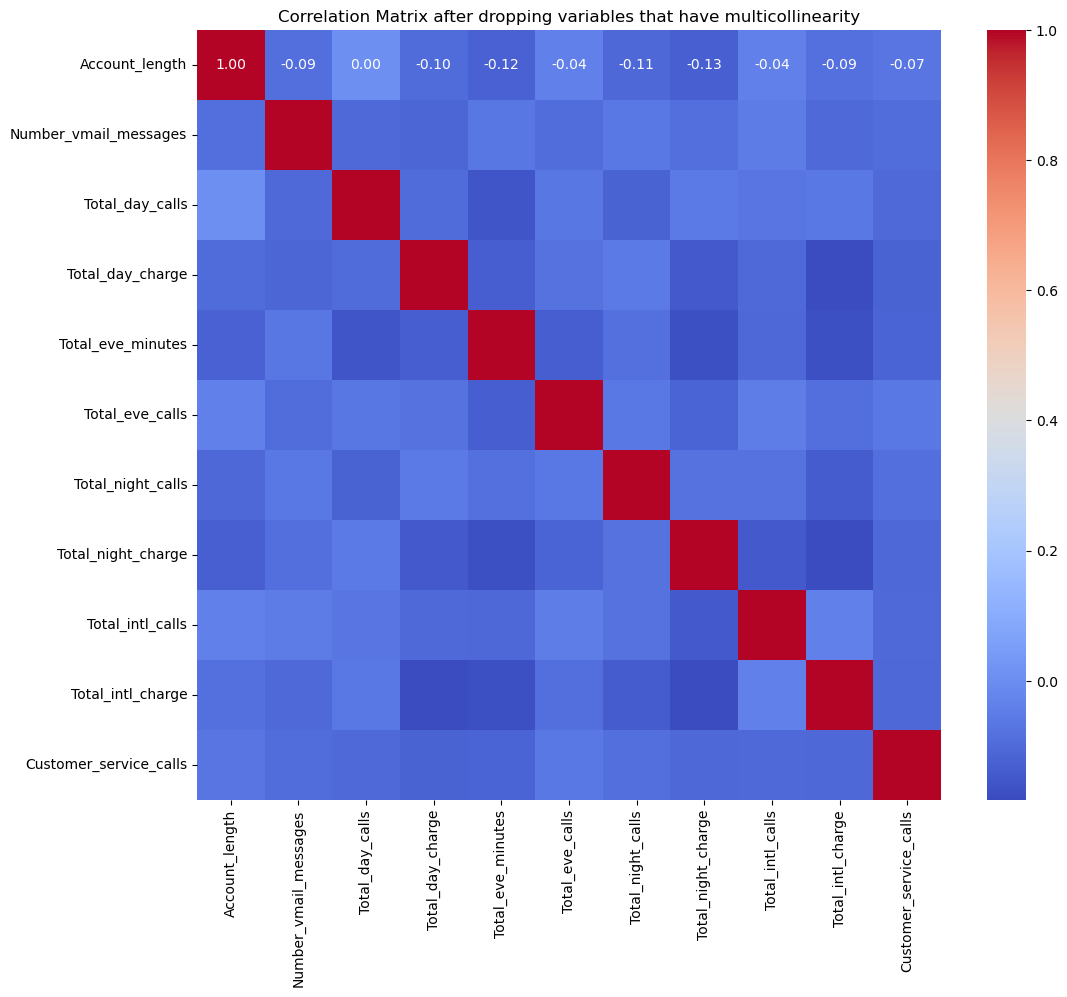

In [16]:
to_drop = ['Total_day_minutes', 'Total_eve_charge', 'Total_night_minutes', 'Total_intl_minutes']
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix.drop(columns=to_drop, errors='ignore').corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix after dropping variables that have multicollinearity')
plt.show()

 ### Plotting class distribution (churned vs. not churned)

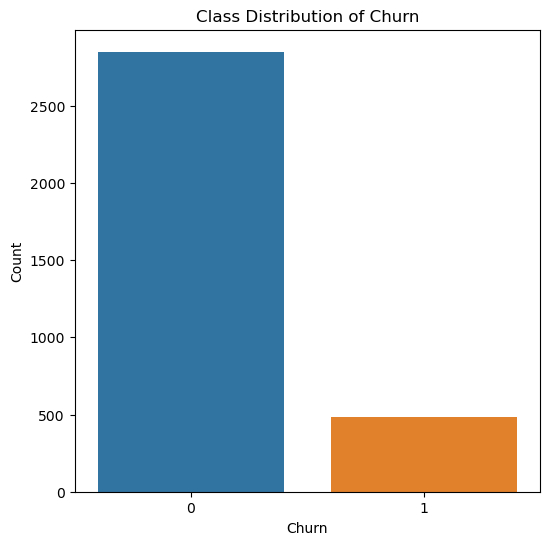

In [17]:

plt.figure(figsize=(6, 6))
sns.countplot(x='Churn', data=combined_df)
plt.title('Class Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


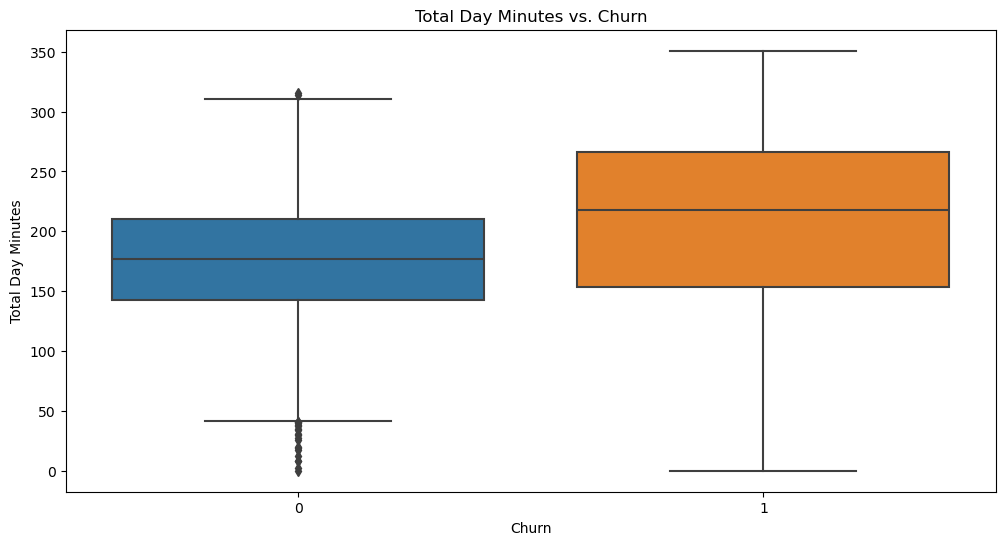

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Churn', y='Total_day_minutes', data=combined_df)
plt.title('Total Day Minutes vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Total Day Minutes')
plt.show()

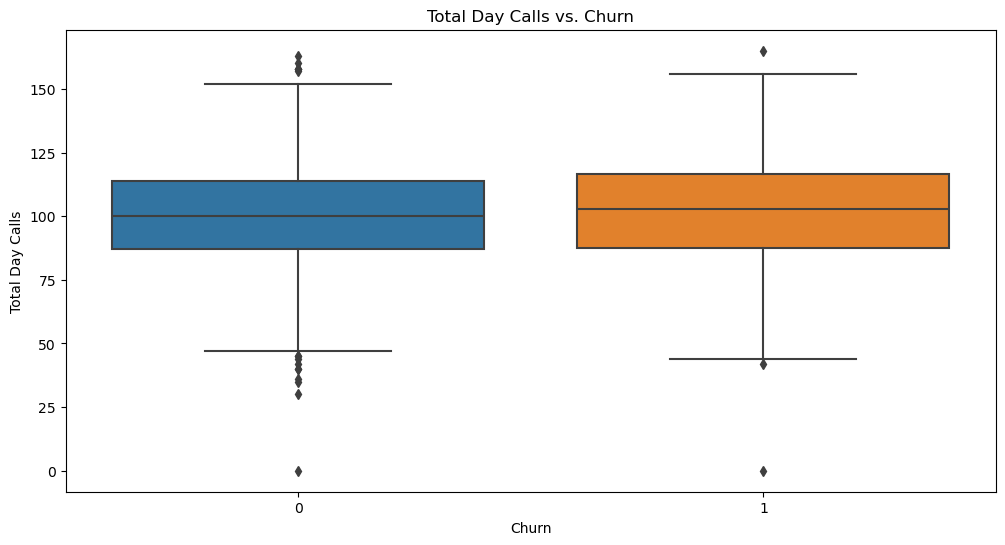

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Churn', y='Total_day_calls', data=combined_df)
plt.title('Total Day Calls vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Total Day Calls')
plt.show()


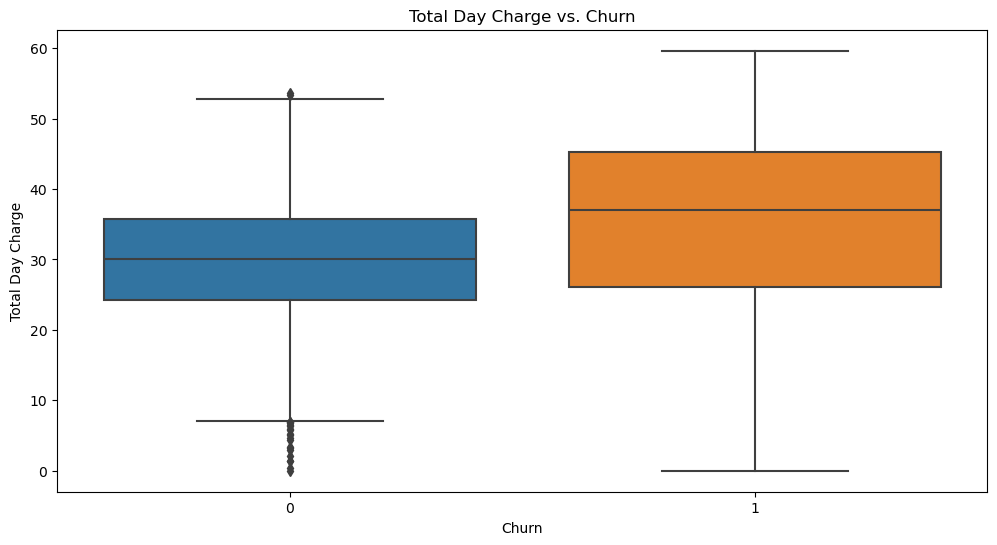

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Churn', y='Total_day_charge', data=combined_df)
plt.title('Total Day Charge vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Total Day Charge')
plt.show()

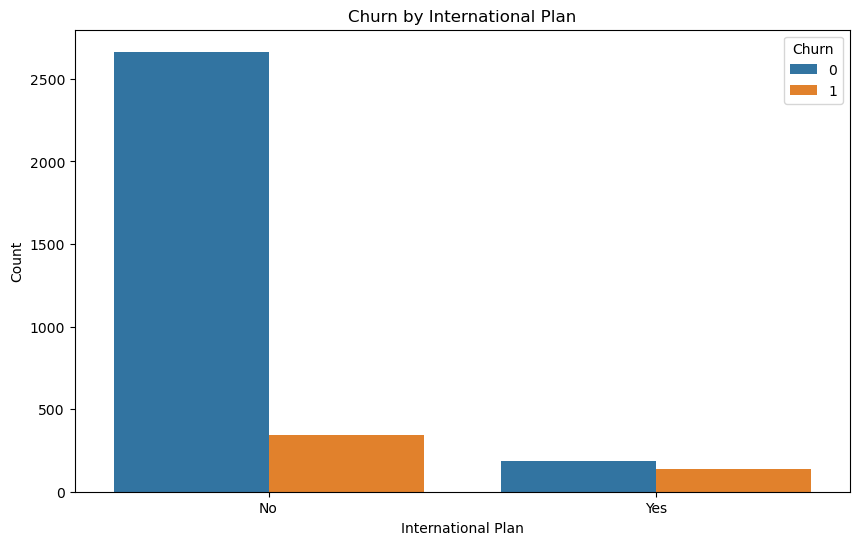

In [21]:
combined_df['International_plan'] = combined_df['International_plan'].astype(str)
combined_df['Churn'] = combined_df['Churn'].astype(str)
plt.figure(figsize=(10, 6))
sns.countplot(x=combined_df['International_plan'], hue=combined_df['Churn'])
plt.title('Churn by International Plan')
plt.xlabel('International Plan')
plt.ylabel('Count')
plt.show()

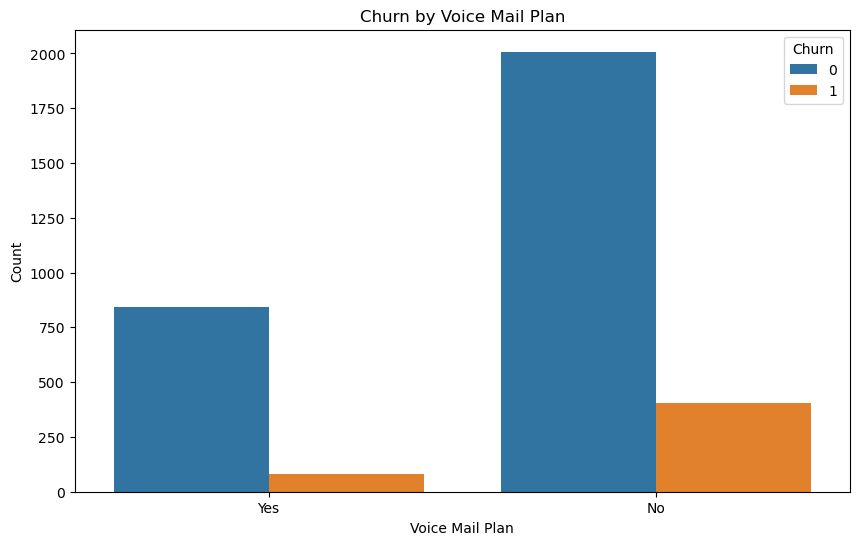

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Voice_mail_plan', hue='Churn', data=combined_df)
plt.title('Churn by Voice Mail Plan')
plt.xlabel('Voice Mail Plan')
plt.ylabel('Count')
plt.show()


In [23]:
combined_df.nunique()

State                       51
Account_length             212
Area_code                    3
International_plan           2
Voice_mail_plan              2
Number_vmail_messages       46
Total_day_minutes         1667
Total_day_calls            119
Total_day_charge          1667
Total_eve_minutes         1611
Total_eve_calls            123
Total_eve_charge          1440
Total_night_minutes       1591
Total_night_calls          120
Total_night_charge         933
Total_intl_minutes         162
Total_intl_calls            21
Total_intl_charge          162
Customer_service_calls      10
Churn                        2
Data_Set                     2
dtype: int64

 ### Plot a pie chart for the 'Churn' column

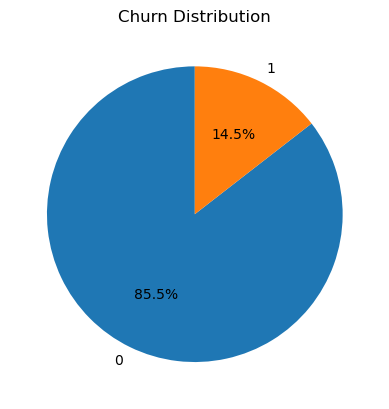

In [24]:
combined_df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Churn Distribution')
plt.ylabel('') 
plt.show()

 ### Plot bar chart for 'Customer service calls'

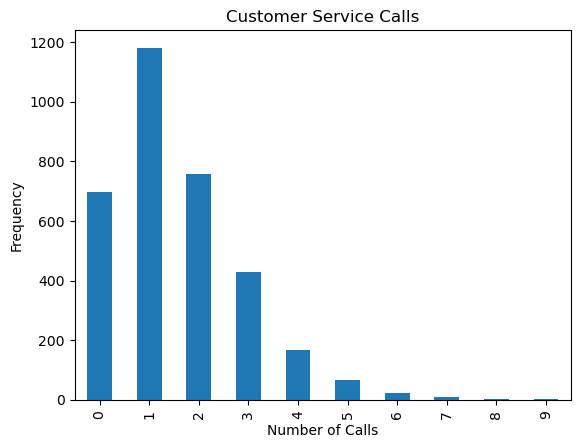

In [25]:
combined_df['Customer_service_calls'].value_counts().sort_index().plot(kind='bar')
plt.title('Customer Service Calls')
plt.xlabel('Number of Calls')
plt.ylabel('Frequency')
plt.show()

### Plot the distribution of customer service calls

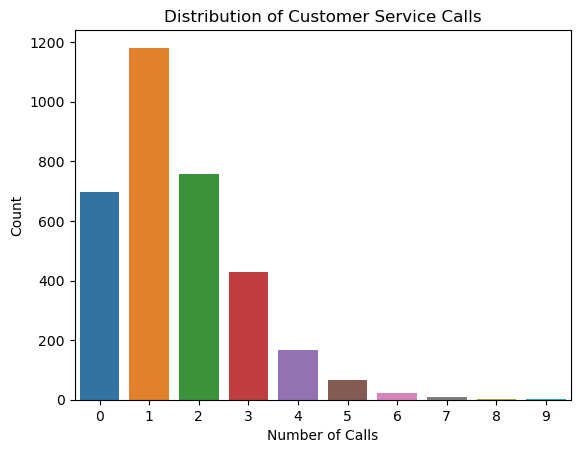

In [26]:

sns.countplot(x='Customer_service_calls', data=combined_df)
plt.title('Distribution of Customer Service Calls')
plt.xlabel('Number of Calls')
plt.ylabel('Count')
plt.show()

In [27]:
print('Description of the Categorical Dataset:')
combined_df.describe(include=['object', 'bool']).T

Description of the Categorical Dataset:


,count,unique,top,freq
State,3333,51,WV,106
International_plan,3333,2,No,3010
Voice_mail_plan,3333,2,No,2411
Churn,3333,2,0,2850
Data_Set,3333,2,train,2666


In [28]:
(combined_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account_length          3333 non-null   int64  
 2   Area_code               3333 non-null   int64  
 3   International_plan      3333 non-null   object 
 4   Voice_mail_plan         3333 non-null   object 
 5   Number_vmail_messages   3333 non-null   int64  
 6   Total_day_minutes       3333 non-null   float64
 7   Total_day_calls         3333 non-null   int64  
 8   Total_day_charge        3333 non-null   float64
 9   Total_eve_minutes       3333 non-null   float64
 10  Total_eve_calls         3333 non-null   int64  
 11  Total_eve_charge        3333 non-null   float64
 12  Total_night_minutes     3333 non-null   float64
 13  Total_night_calls       3333 non-null   int64  
 14  Total_night_charge      3333 non-null   

In [29]:
def preprocess_data(df):
    df['International_plan'] = df['International_plan'].map({'Yes': 1, 'No': 0})
    df['Voice_mail_plan'] = df['Voice_mail_plan'].map({'Yes': 1, 'No': 0})
    return df

In [30]:
combined_df = preprocess_data(combined_df)

In [31]:
print(combined_df['International_plan'].unique())
print(combined_df['Voice_mail_plan'].unique())

[0 1]
[1 0]


In [32]:
def feature_engineering(df):
    df['Total_minutes'] = df['Total_day_minutes'] + df['Total_eve_minutes'] + df['Total_night_minutes'] + df['Total_intl_minutes']
    df['Total_charges'] = df['Total_day_charge'] + df['Total_eve_charge'] + df['Total_night_charge'] + df['Total_intl_charge']
    return df

In [33]:
combined_df = feature_engineering(combined_df)

In [34]:
combined_df = pd.get_dummies(combined_df, columns=['State'])

# Split the data back into train and test sets

In [35]:
train_df = combined_df[combined_df['Data_Set'] == 'train'].drop(columns=['Data_Set'])
test_df = combined_df[combined_df['Data_Set'] == 'test'].drop(columns=['Data_Set'])

In [36]:
X_train = train_df.drop(columns=['Churn'])
y_train = train_df['Churn']

In [37]:
X_test = test_df.drop(columns=['Churn'])
y_test = test_df['Churn']

In [38]:
# Check for missing values in the combined DataFrame
missing_values = combined_df.isnull().sum()
print(missing_values)

Account_length           0
Area_code                0
International_plan       0
Voice_mail_plan          0
Number_vmail_messages    0
                        ..
State_VT                 0
State_WA                 0
State_WI                 0
State_WV                 0
State_WY                 0
Length: 73, dtype: int64


In [39]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [40]:
y_pred = model.predict(X_test)

In [41]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[556  16]
 [ 11  84]]


In [42]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       572
           1       0.84      0.88      0.86        95

    accuracy                           0.96       667
   macro avg       0.91      0.93      0.92       667
weighted avg       0.96      0.96      0.96       667



In [43]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.95952023988006


In [44]:
y_test = y_test.astype(int)
y_pred = y_pred.astype(int)
print(f"Precision: {precision_score(y_test, y_pred)}")

Precision: 0.84


In [45]:
print(f"Recall: {recall_score(y_test, y_pred)}")

Recall: 0.8842105263157894


In [46]:
y_test = y_test.astype(int)
y_pred = y_pred.astype(int)

In [47]:
print(f"F1 Score: {f1_score(y_test, y_pred)}")

F1 Score: 0.8615384615384616


In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [49]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [50]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [51]:
y_pred = knn_model.predict(X_test)

In [52]:
y_pred_int = y_pred.astype(int)
print(classification_report(y_test, y_pred_int))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       572
           1       0.68      0.34      0.45        95

    accuracy                           0.88       667
   macro avg       0.79      0.66      0.69       667
weighted avg       0.87      0.88      0.87       667



In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [56]:
y_pred = logreg_model.predict(X_test_scaled)

In [57]:
y_test = y_test.astype(int)
y_pred = y_pred.astype(int)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [58]:
report = classification_report(y_test, y_pred)

In [59]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print('Classification Report:')
print(report)

Accuracy: 0.8590704647676162
Precision: 0.5106382978723404
Recall: 0.25263157894736843
F1-score: 0.33802816901408456
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       572
           1       0.51      0.25      0.34        95

    accuracy                           0.86       667
   macro avg       0.70      0.61      0.63       667
weighted avg       0.83      0.86      0.84       667



In [60]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[549  23]
 [ 71  24]]


In [61]:
models = ['Decision Tree', 'KNN', 'Logistic Regression']
metrics = ['Precision (Class 0)', 'Recall (Class 0)', 'F1-score (Class 0)',
           'Precision (Class 1)', 'Recall (Class 1)', 'F1-score (Class 1)']
decision_tree_values = [0.98, 0.97, 0.98, 0.84, 0.88, 0.86]
knn_values = [0.90, 0.97, 0.93, 0.68, 0.34, 0.45]
logistic_regression_values = [0.89, 0.96, 0.92, 0.51, 0.25, 0.34]


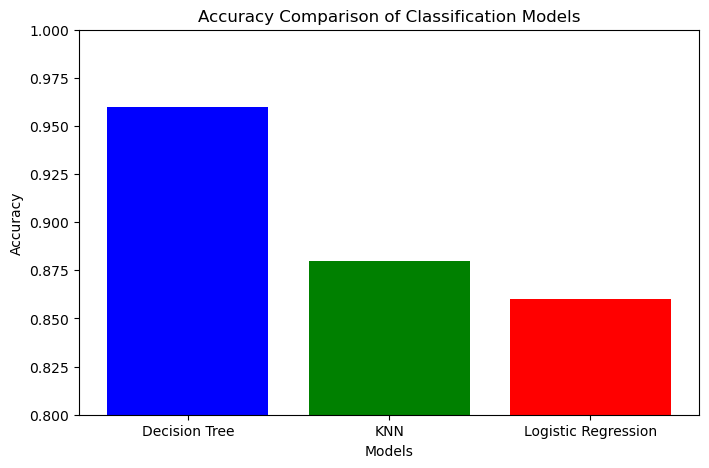

In [62]:
# Data for accuracy from the classification reports
models = ['Decision Tree', 'KNN', 'Logistic Regression']
accuracy_values = [0.96, 0.88, 0.86]  # Accuracy values for each model

# Plotting the bar chart for accuracy
plt.figure(figsize=(8, 5))
plt.bar(models, accuracy_values, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Classification Models')
plt.ylim(0.8, 1.0)  # Set the y-axis limits for better visualization
plt.show()


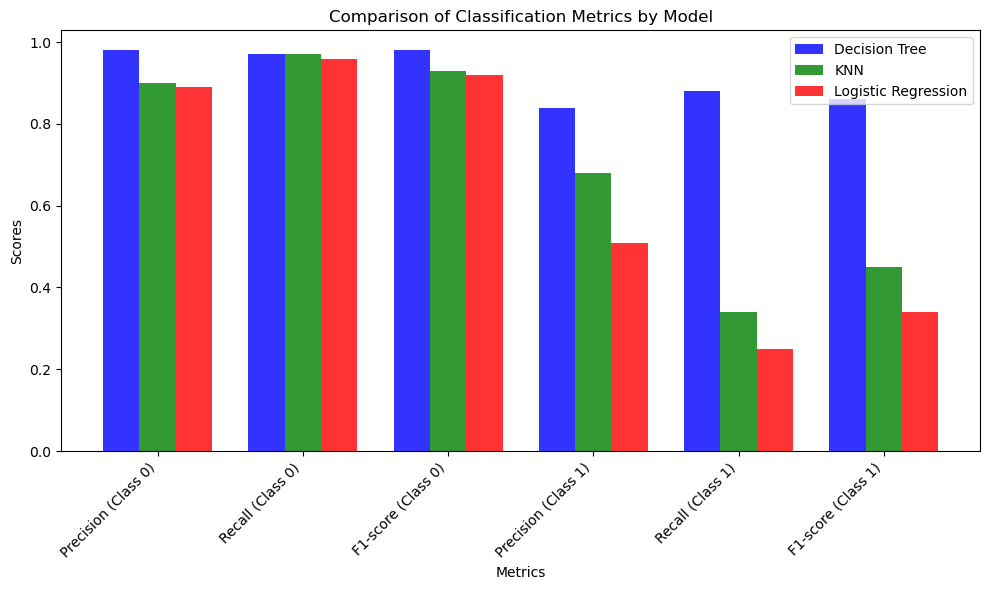

In [63]:

# Data from the classification reports
models = ['Decision Tree', 'KNN', 'Logistic Regression']
metrics = ['Precision (Class 0)', 'Recall (Class 0)', 'F1-score (Class 0)',
           'Precision (Class 1)', 'Recall (Class 1)', 'F1-score (Class 1)']

# Values extracted from the reports
decision_tree_values = [0.98, 0.97, 0.98, 0.84, 0.88, 0.86]
knn_values = [0.90, 0.97, 0.93, 0.68, 0.34, 0.45]
logistic_regression_values = [0.89, 0.96, 0.92, 0.51, 0.25, 0.34]

# Plotting the bar chart with custom colors
fig, ax = plt.subplots(figsize=(10, 6))
index = range(len(metrics))

bar_width = 0.25
opacity = 0.8

# Custom colors for each model
colors = ['blue', 'green', 'red'] 

rects1 = plt.bar(index, decision_tree_values, bar_width,
                 alpha=opacity,
                 color=colors[0],
                 label='Decision Tree')

rects2 = plt.bar([p + bar_width for p in index], knn_values, bar_width,
                 alpha=opacity,
                 color=colors[1],
                 label='KNN')

rects3 = plt.bar([p + bar_width * 2 for p in index], logistic_regression_values, bar_width,
                 alpha=opacity,
                 color=colors[2],
                 label='Logistic Regression')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of Classification Metrics by Model')
plt.xticks([p + bar_width for p in index], metrics, rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()
